<a href="https://colab.research.google.com/github/saran459/OIBSIP-task-1-/blob/main/TASK_1_(HOUSE_PRICE_PREDICTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-squared: 0.6463350878895877


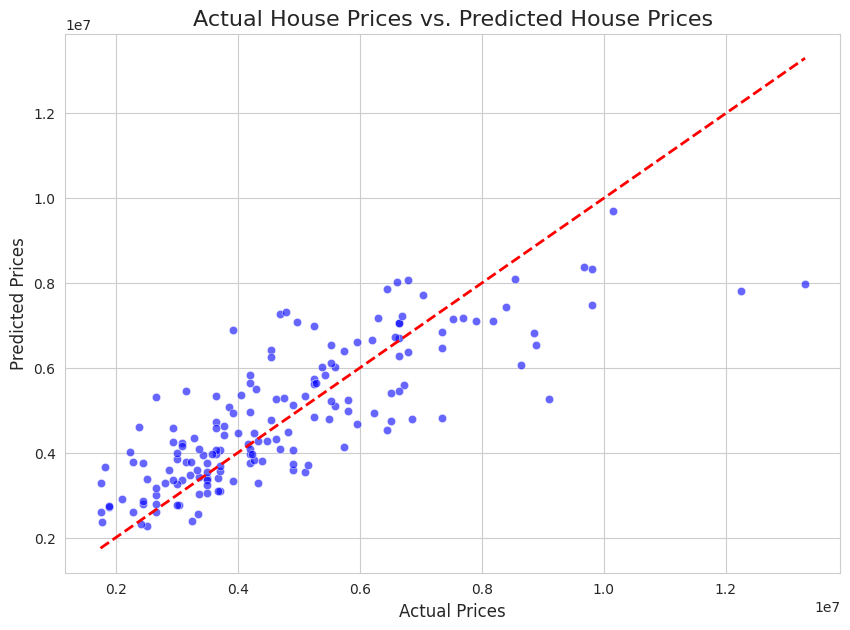

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset from the CSV file
df = pd.read_csv('/content/House price prediction.csv')
# --- Data Preprocessing ---
# 1. Encode binary categorical columns ('yes'/'no' to 1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})
# 2. Apply one-hot encoding to 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
# --- Model Training ---
# Define features (X) and target (y)
X = df.drop('price', axis=1) # Features DataFrame
y = df['price']              # Target Series
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train) # Train the model using the training data
# --- Model Evaluation ---
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)
# Print the R-squared value
print(f"R-squared: {r_squared}")
# --- Visualization ---
# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7)) # Set the figure size for better readability
# Create a scatter plot of actual prices vs. predicted prices
# Each point represents a house: its actual price on the x-axis and the model's predicted price on the y-axis.
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='w', linewidth=0.5)
# Plot a perfect prediction line (y=x)
# This red dashed line indicates where predicted values would perfectly match actual values.
# Points closer to this line mean better predictions.
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual House Prices vs. Predicted House Prices', fontsize=16) # Title of the plot
plt.xlabel('Actual Prices', fontsize=12) # X-axis label
plt.ylabel('Predicted Prices', fontsize=12) # Y-axis label
plt.grid(True) # Show grid for easier reading of values
plt.show()